# Parameter Estimation for a Binomial Distribution

Author: Jake VanderPlas  
License: BSD  

The figure produced by this code is published in the textbook  
*"Statistics, Data Mining, and Machine Learning in Astronomy"* (2013)  

For more information, see http://astroML.github.com  
To report a bug or issue, use the following forum: https://groups.google.com/forum/#!forum/astroml-general  

## Introduction
This chapter illustrates the uses of parameter estimation in generating Binomial distribution for a set of measurement, and investigates how the change of parameter **b** (explained below) will change the probability result. In astronomical application, we can use this binary result distrinution to statistically determine the fraction of galaxies
which show evidence for a black hole in their center. This chapter will compare the conclusion drawn from Binomial distribution and from Gaussian distribution using a sample data.
  
## Binomial Distribution
Unlike the Gaussian distribution, which describes the distribution of a continuous variable, the
binomial distribution describes the distribution of a variable that can take only two discrete values
(say, 0 or 1, or success vs. failure, or an event happening or not). If the probability of success is **b**,
then the distribution of a discrete variable k (an integer number, unlike x which is a real number)
that measures how many times success occurred in N trials (i.e., measurements), is given by
$$p(k|b,N)=\frac{N!}{k!(N-k)!}b^k(1-b)^{N-k}$$
Here we have the mean of the binomial distribution given by $\bar{k} = bN$.  
The standard deviation is $\sigma_k = [N b(1-b)]^{1/2}$.  
And the uncertainty (standard error) is $\sigma_b = \sigma_k/N$.  
  
## Posterior probability distribution in binomial distribution
Given a set of N measurements (or trials), ${x_i}$, drawn from a binomial distribution described with parameter b, we seek the posterior probability distribution $p(b|{x_i}$). 

When N is large, b and its (presumably Gaussian) uncertainty $\sigma_b$ can be determined using the equation above. For small N, the proper procedure is as follows.
Assuming that the prior for b is at in the range 0-1, the posterior probability for b is
$$p(b|k,N)=Cb^k(1-b)^{N-k}$$
where k is now the actual observed number of successes in a data set of N values, and C is a normalization factor with
can be determined from the condition $\int_0^1 p(b|k,N)db = 1$.
The maximum posterior occurs at $b_0 = k/N$.

## Import Data and Functions

In [ ]:
import numpy as np
import matplotlib
from scipy.stats import norm
from matplotlib import pyplot as plt

### Define functions and calculate result from data
Here we vary the b value and draw the resulted posterior probability distribution from our data set. The equation is described below:
$$p(b|k,N)=Cb^k(1-b)^{N-k}$$
In comparison, we also calculate a Gaussian distribution from the same data set.

In [ ]:
n = 10  # number of points
k = 4   # number of successes from n draws

b = np.linspace(0, 1, 100)
db = b[1] - b[0]

# compute the probability p(b) 
p_b = b ** k * (1 - b) ** (n - k)
p_b /= p_b.sum()
p_b /= db
cuml_p_b = p_b.cumsum()
cuml_p_b /= cuml_p_b[-1]

# compute the gaussian approximation
p_g = norm(k * 1. / n, 0.16).pdf(b)
cuml_p_g = p_g.cumsum()
cuml_p_g /= cuml_p_g[-1]

### Show comparison result
* The solid line in the left panel shows the posterior pdf $p(b|k,N)$ for k = 4
and N = 10. The dashed line shows a Gaussian approximation. 
* The right panel shows the corresponding cumulative distributions.  
In comparison, a value of 0.1 is marginally likely according to the Gaussian approximation
($p_{approx}$(< 0.1) $\approx$ 0.03) but strongly rejected by the true distribution ($p_{true}$(< 0.1) $\approx$ 0.003).

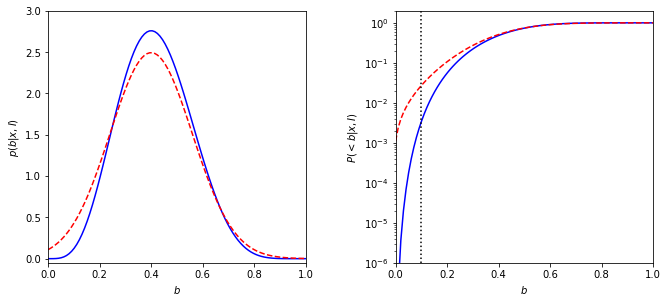

In [ ]:
# Plot posterior as a function of b
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

ax = fig.add_subplot(121)
ax.plot(b, p_b, '-b')
ax.plot(b, p_g, '--r')

ax.set_ylim(-0.05, 3)
ax.set_xlim(0,1)

ax.set_xlabel('$b$')
ax.set_ylabel('$p(b|x,I)$')

ax = fig.add_subplot(122, yscale='log')
ax.plot(b, cuml_p_b, '-b')
ax.plot(b, cuml_p_g, '--r')
ax.plot([0.1, 0.1], [1E-6, 2], ':k')

ax.set_xlabel('$b$')
ax.set_ylabel('$P(<b|x,I)$')
ax.set_ylim(1E-6, 2)
ax.set_xlim(0,1)

plt.show()

## Log-likelihood for Binomial Distribution
Suppose we have N measurements, ${x_i}$. The measurement errors are gaussian, and the measurement error for each
measurement is $\sigma_i$. This method applies logrithm in searching the posterior probability density function (pdf).
Given that the likelihood function for a single measurement, $x_i$, is assumed to follow a Gaussian
distribution $\mathcal{N}(\mu,\sigma)$, the likelihood for all measurements is given by
$$L_p({x_i}|b,k,N) = ln[p(b,k,N|{x_i})]$$

In [1]:
# Define the function for calculating log-likelihood Binomial distribution
def bi_logL(b, k, n):
    """Binomial likelihood"""
    return np.log( b**k * (1-b)**(n-k) )

# Define the grid and compute logL
b = np.linspace(1, 5, 70)
k = np.linspace(1, 5, 70)
n = 70

logL = bi_logL(b, k, n)
logL -= logL.max()

## plot result

In [2]:
fig = plt.figure(figsize=(5, 3.75))
plt.imshow(logL, origin='lower',
           extent=(b[0], b[-1], k[0], k[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(b, k, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()